<a href="https://colab.research.google.com/github/sunandhini96/TSAI_ERAV1/blob/main/Session_19/clip_model_gradio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # A CLIP application on gradio/spaces using open-source models:

## Clip model

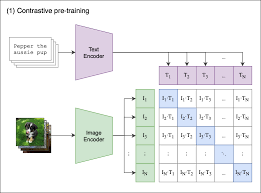

The CLIP model, or "Contrastive Language-Image Pre-training," is a deep learning model developed by OpenAI. It's designed to understand and connect images and text in a way that's similar to how humans do.

## importing all the packages

In [1]:
!pip install gradio transformers torch



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 59.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 102.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.9/92.9 kB 14.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.7/302.7 kB 40.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 36.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.8/395.8 kB 43.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 98.1 

In [2]:
cd /content/sample_data

/content/sample_data


## clip model using gradio

In [3]:
import gradio as gr
from transformers import CLIPProcessor, CLIPModel

# Load the CLIP model and processor
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

def clip_inference(input_img, input_text):
    # Split input_text into a list of text entries
    text_entries = [text.strip() for text in input_text.split(",")]

    # Prepare inputs for CLIP model
    inputs = processor(text=text_entries, images=input_img, return_tensors="pt", padding=True)

    # Get similarity scores
    outputs = model(**inputs)
    logits_per_image = outputs.logits_per_image
    probs = logits_per_image.softmax(dim=1)

    # Format the output probabilities as a comma-separated string
    output_prob = ', '.join([str(prob.item()) for prob in probs[0]])

    return output_prob

title = "CLIP OpenAI Model"
description = "Find similarity between images and multiple text entries (separated by commas)."
text_examples = ["a sky with full of stars, painting image",
                 "a dog playing in the garden, a dog sleeping in the garden",
                 "a small girl dancing, a small girl playing guitar",
                 "a small family cooking in the kitchen,family watching the movie",
                 "students inside the class,students playing in the ground ",
                 "a traffic signal, a lot of cars",
                 "a theatre, a football stadium",
                 "group of animals, group of birds",
                 "yellow sunflowers, red roses",
                 "sunset across the lake, sky with full of stars"]

examples = [["examples/images_" + str(i) + ".jpg", text] for i, text in enumerate(text_examples)]

demo = gr.Interface(
    clip_inference,
    inputs=[
        gr.Image(label="Input image"),
        gr.Textbox(placeholder="Input text : Multiple entries separated by commas"),
    ],
    outputs=[gr.Textbox(label="similarity scores")],
    title=title,
    description=description,
    examples=examples
)

demo.launch()



Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://2216273065250b18aa.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
